In [7]:
## Import Modules for preprocessing, visualizations, modeling, and model evaluation

import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display

%matplotlib inline

In [8]:
# Read in the required data

train = pd.read_csv(r'C:\Users\hoone\model data\Housing data\train.csv')
test = pd.read_csv(r'C:\Users\hoone\model data\Housing data\test.csv')

In [9]:
# Take a look at the training data and it's shape

train.head()
print(train.shape)

(1460, 81)


In [10]:
# Also take a look at the testing data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
# Count non null values
notnullcount = train.count()

# If there are columns that have more than 30% null values, then we should remove it from the dataset as it won't be reliable
colswithtoomuchnulls = [n for n in notnullcount if n < 0.3 * train.shape[0]]
colstoremove =[]
for c in colswithtoomuchnulls:
    colsrmv = notnullcount[notnullcount == c].index[0]
    colstoremove.append(colsrmv)

# List the columns with more than 30 % missing values    
colstoremove


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
# Remove these columns and show the new training data
train = train.drop(colstoremove,1)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [13]:
# All other columns with less than 30% nulls, let's fill in with the mean value for numerical features
# and the most frequent values for categorical features


trainnew = train
columns = trainnew.columns
for col in columns:
    if(trainnew[col].dtype == np.dtype('O')):
        trainnew[col] = trainnew[col].fillna(trainnew[col].value_counts().index[0])
        #print(trainnew[col].value_counts().index[0])
    else:
        trainnew[col] = trainnew[col].fillna(trainnew[col].mean())


In [14]:
trainnew

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [15]:
## And just to be sure, check to see if there are any nulls still remaining in the training set

trainnew.isnull().sum().any()

False

In [16]:
# Let's divide our training set into 2 datasets, one numerical and the other categorical 
# so we can convert the categorical features to numeric
# Also, drop the ID column as it's not needed to train our model on

dataset = trainnew.drop(['Id'], axis = 1)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dataset_numeric = dataset.select_dtypes(include=numerics)
print("Numeric Data Shape:" + str(dataset_numeric.shape))
# Remember that our numeric dataset has the target variable column so essentially it contains 36 numeric features, not 37

nonnumeric = ['object']
dataset_nonnumeric = trainnew.select_dtypes(include=nonnumeric)
print("Categorical Data Shape:" + str(dataset_nonnumeric.shape))

Numeric Data Shape:(1460, 37)
Categorical Data Shape:(1460, 39)


In [17]:
# Now, let's see if there is skewed data that we should normalize. Higher the number, the more skewed it is

dataset_numeric.skew()

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A070DED68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022A08097F60>]], dtype=object)

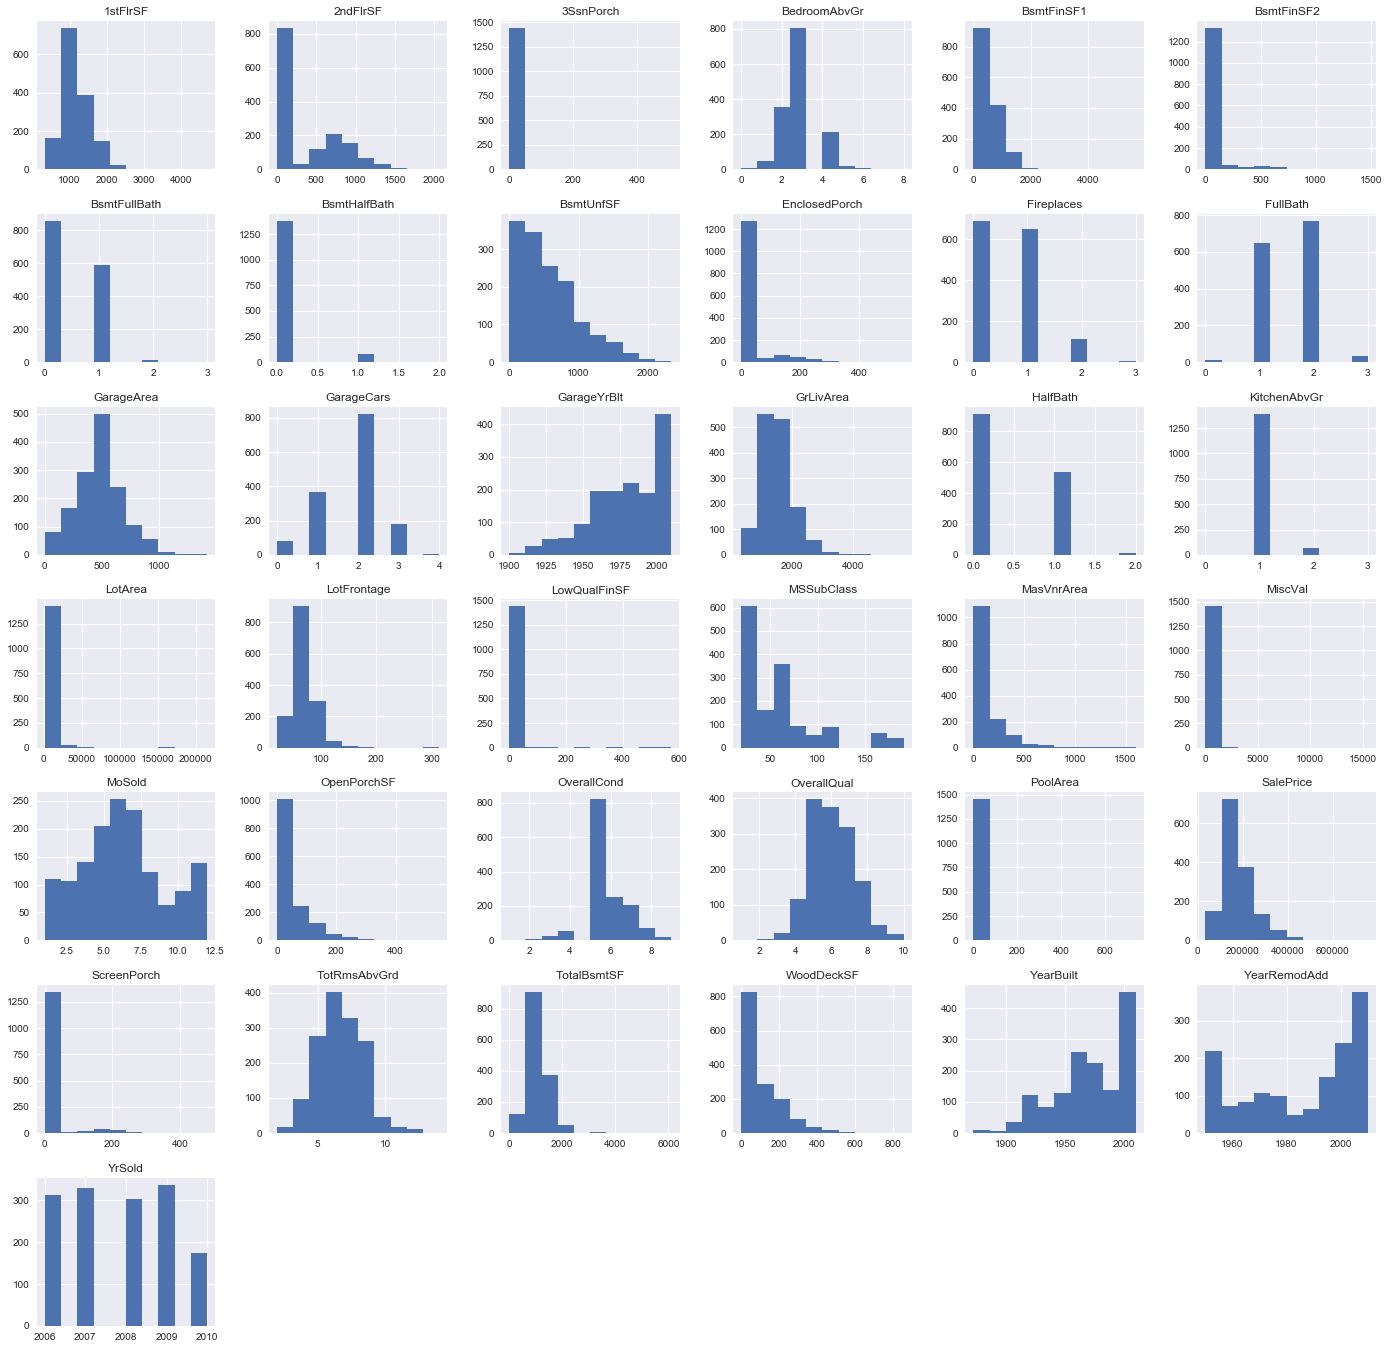

In [18]:
dataset_numeric.hist(figsize=(24,24))

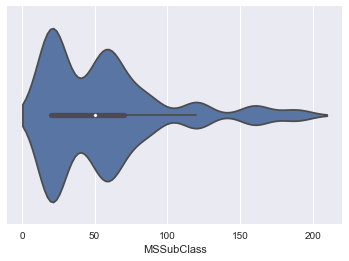

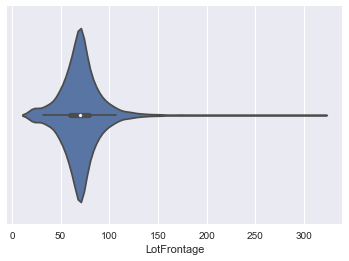

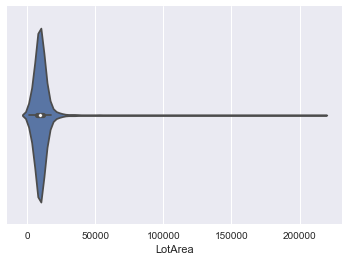

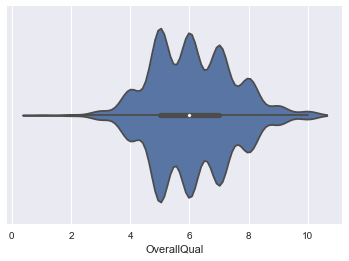

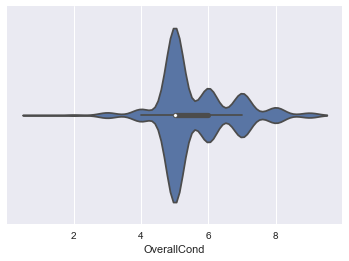

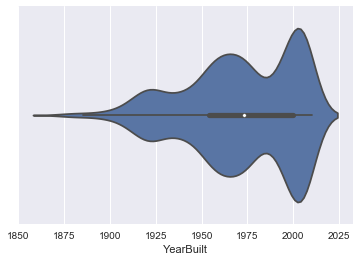

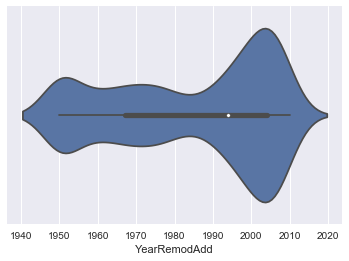

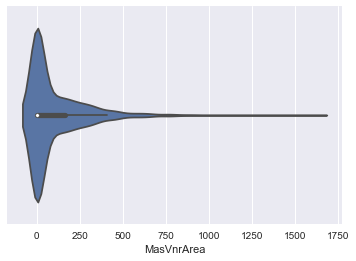

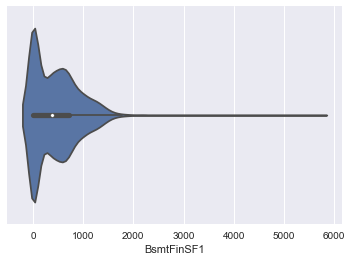

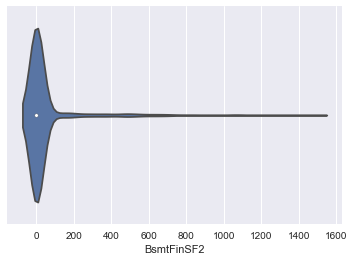

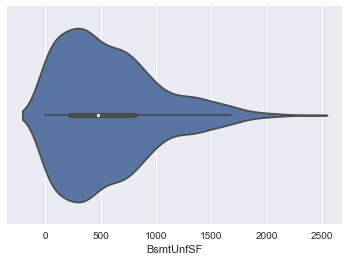

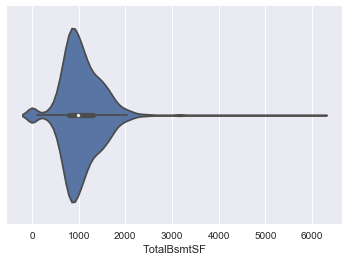

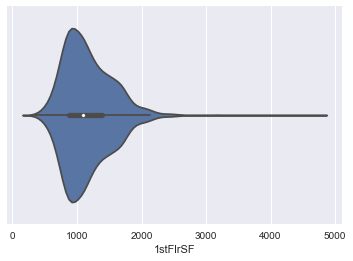

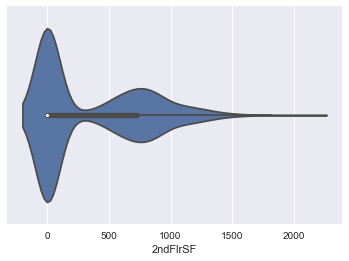

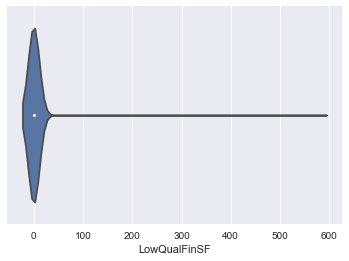

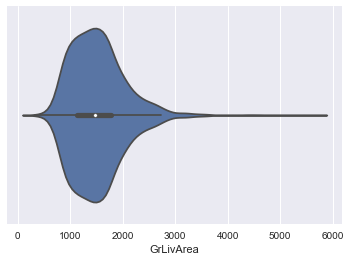

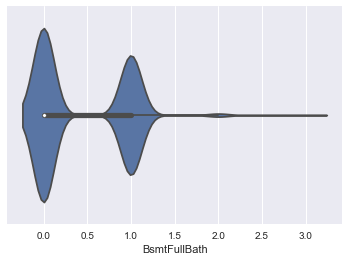

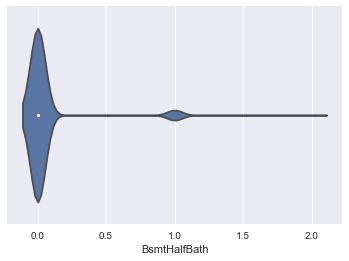

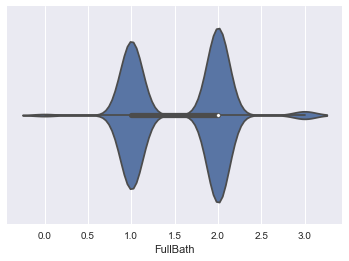

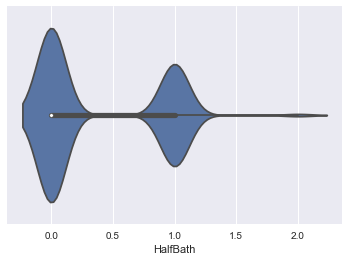

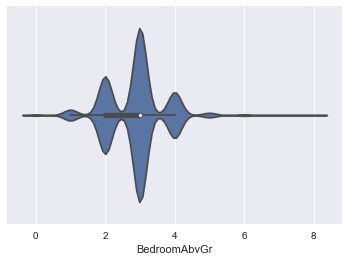

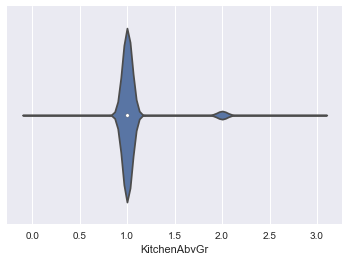

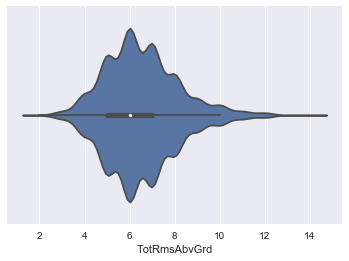

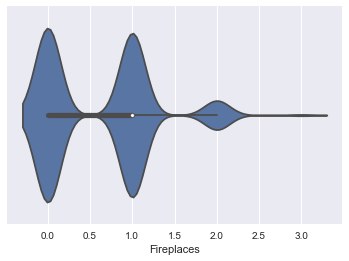

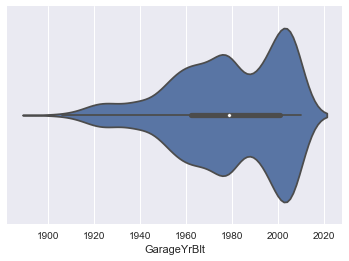

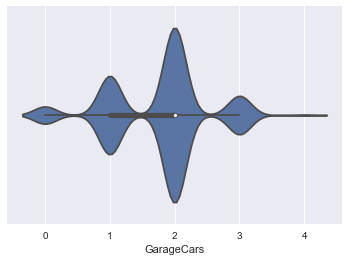

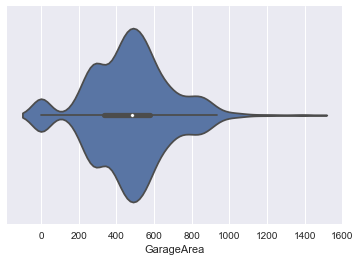

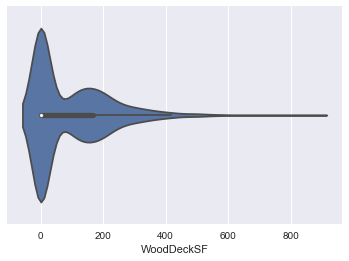

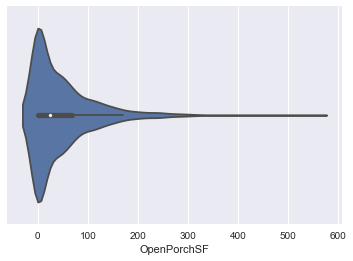

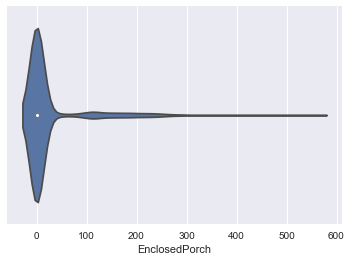

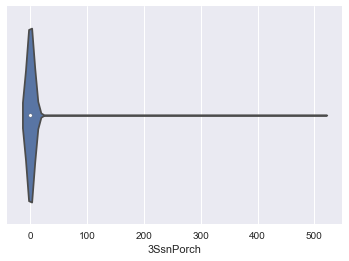

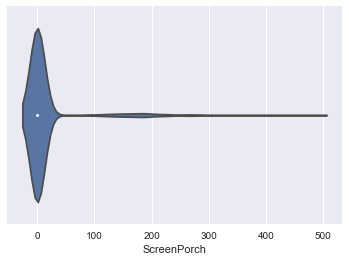

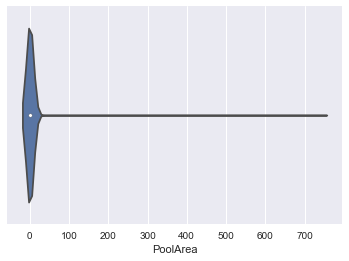

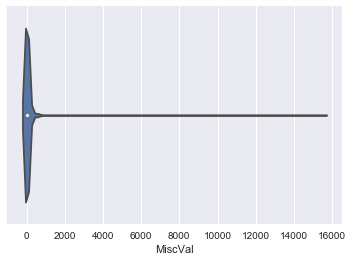

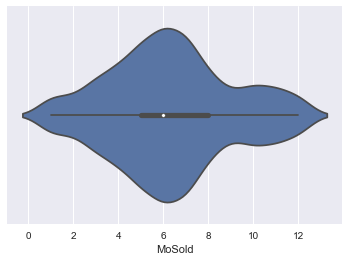

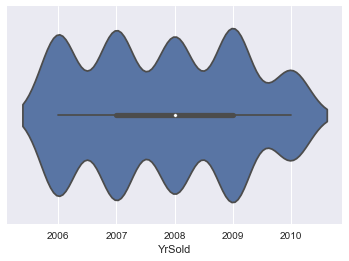

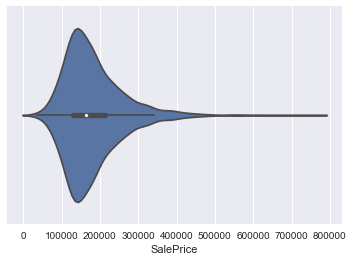

In [19]:
# Plot box and density plots to see the skews in our numeric data columns

cols = dataset_numeric.columns
for c in cols:
    sns.violinplot(dataset_numeric[c])
    plt.xlabel(c)
    plt.show()

In [20]:
# Let's normalize the datapoints that have a high skew by doing the log1p function
#log1p function applies log(1+x) to all datapoints

skew = dataset_numeric.skew()

skewedfeatures = [s for s in skew if(s > 5.0)]
skewedfeatures
for skf in skewedfeatures:
    sk = skew[skew == skf].index[0]
    dataset_numeric[sk] = np.log1p(dataset_numeric[sk])

C:\Users\hoone\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


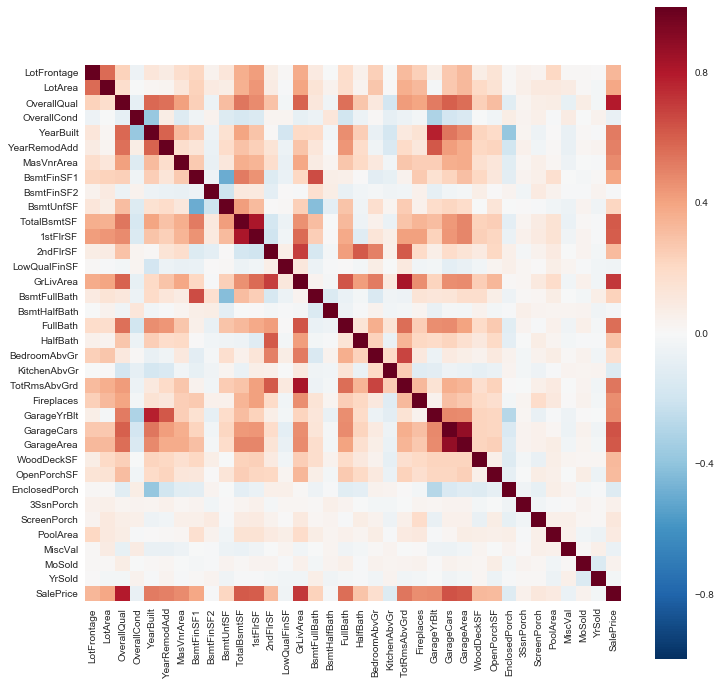

In [21]:
# Correlation between features

corr = dataset_numeric.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)


In [22]:
# numeric values of correlation between variables and target variable

dataset_numeric.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.462639,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.036444,-0.026030,0.008558,-0.033193,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.568199,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.053890,0.037684,0.203543,0.008307,0.010158,0.006768,0.334901
LotArea,-0.462639,0.568199,1.000000,0.178220,-0.006308,0.021943,0.027672,0.123320,0.230978,0.092219,...,0.199855,0.147226,0.010945,0.055375,0.097381,0.097257,0.080298,0.010518,-0.027164,0.388528
OverallQual,0.032628,0.234196,0.178220,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.027546,0.064886,0.072651,-0.085131,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.006308,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.038835,0.054811,-0.008085,0.079251,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.021943,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.028977,-0.050364,0.005805,-0.077819,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.027672,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.052398,-0.038740,0.009025,-0.074574,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.123320,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.017751,0.061453,0.018180,-0.047507,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.230978,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.034468,0.062021,0.162413,-0.003243,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.092219,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.033713,0.088871,0.043141,-0.010178,-0.015211,0.031706,-0.011378


In [23]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = dataset_numeric.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

size = 36

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

GarageCars and GarageArea = 0.88
GrLivArea and TotRmsAbvGrd = 0.83
TotalBsmtSF and 1stFlrSF = 0.82
YearBuilt and GarageYrBlt = 0.78
2ndFlrSF and GrLivArea = 0.69
BedroomAbvGr and TotRmsAbvGrd = 0.68
BsmtFinSF1 and BsmtFullBath = 0.65
GrLivArea and FullBath = 0.63
YearRemodAdd and GarageYrBlt = 0.62
2ndFlrSF and TotRmsAbvGrd = 0.62
2ndFlrSF and HalfBath = 0.61
OverallQual and GarageCars = 0.60
OverallQual and GrLivArea = 0.59
YearBuilt and YearRemodAdd = 0.59
OverallQual and YearBuilt = 0.57
LotFrontage and LotArea = 0.57
1stFlrSF and GrLivArea = 0.57
OverallQual and GarageArea = 0.56
FullBath and TotRmsAbvGrd = 0.55
OverallQual and YearRemodAdd = 0.55
OverallQual and FullBath = 0.55
YearBuilt and GarageCars = 0.54
OverallQual and TotalBsmtSF = 0.54
BsmtFinSF1 and TotalBsmtSF = 0.52
GrLivArea and BedroomAbvGr = 0.52
OverallQual and GarageYrBlt = 0.52
2ndFlrSF and BedroomAbvGr = 0.50


In [24]:
# GarageCars and GarageArea has high correlation with each other and I want to get rid of variables that correlate highly 
# with each other as having both similar data points will not improve my model

# Dropping GarageArea as GarageCars has higher correlation with sale price, our target variable. 
# GarageCars 0.64 vs. GarageArea 0.62
dataset_numeric = dataset_numeric.drop('GarageArea', axis = 1)
dataset_numeric.shape

(1460, 36)

In [25]:
# Assign Sale price column to a y variable and assign all other columns to the X variable 
# to run the train test split function from sklearn later

y = dataset_numeric['SalePrice']
X = dataset_numeric.drop('SalePrice', axis = 1)
print(X.shape)
print(y.shape)

(1460, 35)
(1460,)


In [26]:
# Categorical dataset
dataset_nonnumeric.shape

(1460, 39)

In [27]:
# And now back to our categorical features.  Converting them to numeric values using one hot encoder
# Previously, when I split the training data into numeric and categorical datasets, the categorical dataset had 39 columns

cols = dataset_nonnumeric.columns
split = 39
labels = []
for i in range(0,split):
    traincats = dataset_nonnumeric[cols[i]].unique()
    labels.append(list(set(traincats)))

In [28]:
# A list of all the unique labels for all 39 columns
labels

[['RL', 'C (all)', 'RM', 'RH', 'FV'],
 ['Grvl', 'Pave'],
 ['IR2', 'IR3', 'IR1', 'Reg'],
 ['Low', 'Lvl', 'Bnk', 'HLS'],
 ['NoSeWa', 'AllPub'],
 ['CulDSac', 'FR2', 'Inside', 'Corner', 'FR3'],
 ['Gtl', 'Mod', 'Sev'],
 ['Veenker',
  'StoneBr',
  'MeadowV',
  'Crawfor',
  'BrkSide',
  'NoRidge',
  'SWISU',
  'Edwards',
  'IDOTRR',
  'NPkVill',
  'NAmes',
  'CollgCr',
  'Sawyer',
  'NridgHt',
  'SawyerW',
  'Blueste',
  'OldTown',
  'ClearCr',
  'BrDale',
  'Somerst',
  'Timber',
  'Blmngtn',
  'Mitchel',
  'Gilbert',
  'NWAmes'],
 ['Feedr', 'RRNn', 'RRAn', 'RRAe', 'RRNe', 'PosA', 'Norm', 'Artery', 'PosN'],
 ['Feedr', 'RRNn', 'RRAn', 'RRAe', 'PosA', 'Norm', 'Artery', 'PosN'],
 ['1Fam', 'TwnhsE', '2fmCon', 'Twnhs', 'Duplex'],
 ['1Story',
  '1.5Fin',
  '2.5Unf',
  'SLvl',
  '1.5Unf',
  '2Story',
  '2.5Fin',
  'SFoyer'],
 ['Hip', 'Mansard', 'Shed', 'Gable', 'Flat', 'Gambrel'],
 ['WdShngl',
  'ClyTile',
  'CompShg',
  'Roll',
  'WdShake',
  'Metal',
  'Tar&Grv',
  'Membran'],
 ['WdShing',
  'Stu

In [29]:
#Using One hot encoder from sklearn, convert all categorical values to numeric values

cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_nonnumeric.iloc[:,i])
    feature = feature.reshape(dataset_nonnumeric.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Our "cats" list has 39 arrays of numerical values to represent our 39 categorical columns 
# cats

In [30]:
len(cats)

39

In [31]:
# Taking a look at the numerical values given to the categories for the 1st item in our array
## np.set_printoptions(threshold=np.inf)
## cats[0]

In [32]:
# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

(1460, 239)


In [33]:
# Add our converted categorical values to the numerical dataset
X = np.concatenate((encoded_cats,X.values),axis=1)

X.shape

(1460, 274)

In [34]:
y.shape

(1460,)

In [35]:
# Split the data into training and testing sets, default test size becomes 25%
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import Lasso
clf1 = Lasso(alpha = 1.0, max_iter = 100)
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
## sale price predictions stored in an array which is assigned to the predictions variable

C:\Users\hoone\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [36]:
# Checking length on predictions 
len(predictions)

365

In [37]:
# r2 score to evaluate the model, ranging from 0 to 1, closer to 1 the better
# 1st version of model, 2nd version of model below

from sklearn.metrics import r2_score

print("Lasso has r2 Score: ",r2_score(y_test, clf1.predict(X_test)))

Lasso has r2 Score:  0.900632078639


In [38]:
# Do the same preprocessing to the test dataset
dataset_test = test

#Drop unnecessary columns
ID = dataset_test['Id']
dataset_test.drop('Id',axis=1,inplace=True)
dataset_test.shape

(1459, 79)

In [39]:
dataset_test = dataset_test.drop(colstoremove,1)

columns = dataset_test.columns
for col in columns:
    if(dataset_test[col].dtype == np.dtype('O')):
        dataset_test[col] = dataset_test[col].fillna(dataset_test[col].value_counts().index[0])
    else:
        dataset_test[col] = dataset_test[col].fillna(dataset_test[col].mean())


datasettest_numeric = dataset_test.select_dtypes(include=numerics)
datasettest_nonnumeric = dataset_test.select_dtypes(include=nonnumeric)

for skf in skewedfeatures:
    sk = skew[skew == skf].index[0]
    datasettest_numeric[sk] = np.log1p(datasettest_numeric[sk])
datasettest_numeric = datasettest_numeric.drop('GarageArea', axis = 1)
datasettest_numeric.shape

C:\Users\hoone\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1459, 35)

In [40]:
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(datasettest_nonnumeric.iloc[:,i])
    feature = feature.reshape(datasettest_nonnumeric.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)
    
# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)

#Concatenate encoded attributes with continuous attributes
test = np.concatenate((encoded_cats,datasettest_numeric.values),axis=1)
test.shape

(1459, 274)

In [41]:
len(ID)
test.shape

(1459, 274)

In [42]:
clf2 = Lasso(alpha = 0.00099, max_iter=50000)
clf2.fit(X, y)
predictions2 = clf2.predict(test)

results_dataframe = pd.DataFrame({
    "Id" : ID,
    "SalePrice": predictions2
})

results_dataframe.to_csv("fourth_submission.csv", index = False)

C:\Users\hoone\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [43]:
## second version of model has higher r2 score

print("Lasso has r2 Score: ",r2_score(y, clf2.predict(X)))

Lasso has r2 Score:  0.929795068559
